# Project 9: A Data Analysis of Your Own

#### Written by Kaleo Toguchi-Tani

****

Native Hawaiian (Kānaka Maoli or Kānaka ʻŌiwi) students are among the most underprivileged students in Hawaiʻi's state public school system, such as lower high school and college graduation rates compared to other ethnic groups [https://pmc.ncbi.nlm.nih.gov/articles/PMC6949472/].

According to an audit from Kamehameha Schools in 2003 [https://www.ksbe.edu/assets/research/collection/03_0204_kanaiaupuni.pdf], schools with high concentrations of Native Hawaiians tend to have teachers with less experience and tenure, standardized test scores lower than all other ethnic groups (lagging behind DOE everages), overrepresentation in the special education system (18% compared to 11%), chronic absences (10% of Native Hawaiian students missed more than 20 days in a semester), and highest rates of juvenile arrest.

Native Hawaiian students are consistently left behind within the state public school system. But this report was from 2003, not 2025. So my goal as kamaʻāina (Hawaiʻi-born), is to see if these statistics have changed since the audit was performed, and that things have improved for Kānaka ʻŌiwi students.

For this data analysis, I will be using data from the Office of Hawaiian Affairs (OHA) under the native Hawaiian Data Book [https://www.ohadatabook.com/fr_intro.21.html]. This data book was produced, "to compile basic demographic data on native Hawaiians and Hawaiians, and identify the physical, sociological, psychological, and economic needs of native Hawaiians and Hawaiians." This data goes up to the school year of 2022-2023. The Education system is linked here, under Chapter 06: Education, [https://www.ohadatabook.com/fr_updates.21.html#EDU].

This notebook will go through the data analysis for answering the following questions:

1) How has public school enrollment changed over time for Native Hawaiians?
2) How has the educational attainment for Native Hawaiians changed from 2010-2021? How does this compare to other ethnicities in Hawaiʻi?
3) How is Native Hawaiian enrollment in public high school currently distributed geographically across islands? Which district has the highest proportion of Native Hawaiian students in public high schools?

***

Let's start with loading in our excel file, our relevant packages for this data analysis, along with some formatting code for matplotlib. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

plt.rc('axes', labelsize = 20, linewidth = 2)
plt.rc('ytick', direction='in', right = True, labelsize = 20)
plt.rc('xtick', direction='in', top = True, labelsize = 20)
plt.rc('ytick.major', width=2, size=7)
plt.rc('xtick.major', width=2, size=7)

In [37]:
#Need to see all of the sheet names since this has multiple

excel = pd.ExcelFile("CHAP 06 Education UPDATE.21.xlsx")

In [38]:
print(excel.sheet_names)

['Title', 'Introduction', 'Table 6.01', 'Table 6.02', 'Table 6.03', 'Table 6.04', 'Table 6.05', 'Table 6.06', 'Table 6.10', 'Table 6.11', 'Table 6.12', 'Table 6.13', 'Table 6.14', 'Table 6.26', 'Table 6.31', 'Table 6.32', 'Table 6.33', 'Table 6.63', 'Table 6.64', 'Table 6.65', 'Table 6.66', 'Table 6.67', 'Table 6.68', 'Table 6.72', 'Table 6.73']


We can see that our excel spreadsheet is nested, meaning there are individual tables within one sheet. To make matters harder for ourselves, there are also multiple tables in a single table which we can view by opening our data within excel since we are able to do that. 

Now that we have all of our packages and base data loaded in, let's break this down by addressing each question, and showcasing the data analysis and wrangling needed for each. 

***

## How has public school enrollment changed over time for Native Hawaiian students?

We first load in our relevant tables. We need Table 6.14, which contains Private School Enrollment in Hawaii, from 2021-2013 to 2022-2023. Then we need Table 6.26 which holds the State Public School Student enrollment. 

In [39]:
publicHS = pd.read_excel(excel, sheet_name="Table 6.26")  

In [40]:
#View the headers so we can see which rows we need to skip
publicHS.head(7)

,Table 6.26 Public/Private School Enrollment in Hawai‘i: SY 1986-1987 to SY 2022-2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,School Year,All Students,State Public School Students,NaN,NaN,NaN,Private School Students,NaN
2,NaN,NaN,Native Hawaiian,Charter Schools,Department Schools,NaN,NaN,NaN
3,NaN,No.,No.,No.,No.,%,No.,%
4,2022-23,NaN,NaN,NaN,NaN,NaN,33533,NaN
5,2021-22,204842,40543,12097,159503,0.778664,33242,0.162281
6,2020-21,207197,41577,12213,162491,0.784234,32493,0.156822


As we can see, our excel sheet isn't exactly machine-readable friendly. We'll have to do some clean up and wrangling to make things comprehensible for Python to read this data in.

Our biggest issue we can see is that our column names are offset. I'll manually make a list for the column names, assign the column names after we skip the rows that have the headers within it (4 rows), then read in the data that way.

In [42]:
publicNames = ["School_Year", "All_Students", "Native_Hawaiian", "Charter_Schools", "Department_Schools_Number", "Department_Percent", "Private_School_Enrollment_Number", "Private_Percent"]

publicHS = pd.read_excel(excel, sheet_name="Table 6.26", skiprows=4, names=publicNames)

We can take a peak into our data set to see if we did our cleaning correctly by printing out the .head(). 

In [50]:
publicHS.head(5)

,School_Year,All_Students,Native_Hawaiian,Charter_Schools,Department_Schools_Number,Department_Percent,Private_School_Enrollment_Number,Private_Percent
0,2022-23,NaN,NaN,NaN,NaN,NaN,33533,NaN
1,2021-22,204842.0,40543.0,12097.0,159503.0,0.778664,33242,0.162281
2,2020-21,207197.0,41577.0,12213.0,162491.0,0.784234,32493,0.156822
3,2019-20,213193.0,42872.0,11877.0,167454.0,0.785457,33862,0.158833
4,2018-19,214506.0,43609.0,11546.0,168152.0,0.783903,34808,0.162271


It looks like we have some missing data. But first, due to the messiness of this data set, let's ensure that all of our years in our "School_Year" column are within the right format. The format of our Year column is in YYYY-YY, so we need to mimic that within our next statement to keep only those rows that contains that format.

In [45]:
publicHS = publicHS[publicHS['School_Year'].astype(str).str.contains(r'\d{4}-\d{2}')]

In [47]:
publicHS.head(5)

,School_Year,All_Students,Native_Hawaiian,Charter_Schools,Department_Schools_Number,Department_Percent,Private_School_Enrollment_Number,Private_Percent
0,2022-23,NaN,NaN,NaN,NaN,NaN,33533,NaN
1,2021-22,204842.0,40543.0,12097.0,159503.0,0.778664,33242,0.162281
2,2020-21,207197.0,41577.0,12213.0,162491.0,0.784234,32493,0.156822
3,2019-20,213193.0,42872.0,11877.0,167454.0,0.785457,33862,0.158833
4,2018-19,214506.0,43609.0,11546.0,168152.0,0.783903,34808,0.162271


Now that we've addressed that, let's address the missing data by dropping that row.

In [51]:
publicHS = publicHS.dropna(subset=["Native_Hawaiian"])

In [52]:
publicHS.head(5)

,School_Year,All_Students,Native_Hawaiian,Charter_Schools,Department_Schools_Number,Department_Percent,Private_School_Enrollment_Number,Private_Percent
1,2021-22,204842.0,40543.0,12097.0,159503.0,0.778664,33242,0.162281
2,2020-21,207197.0,41577.0,12213.0,162491.0,0.784234,32493,0.156822
3,2019-20,213193.0,42872.0,11877.0,167454.0,0.785457,33862,0.158833
4,2018-19,214506.0,43609.0,11546.0,168152.0,0.783903,34808,0.162271
5,2017-18,214709.0,44556.0,11160.0,168095.0,0.782897,35454,0.165126


Great, with that, we have our cleaned data frame!

For plotting, I want this to go from the oldest year to the earliest, so we need to sort our values.

In [66]:
publicHS = publicHS.sort_values('School_Year')

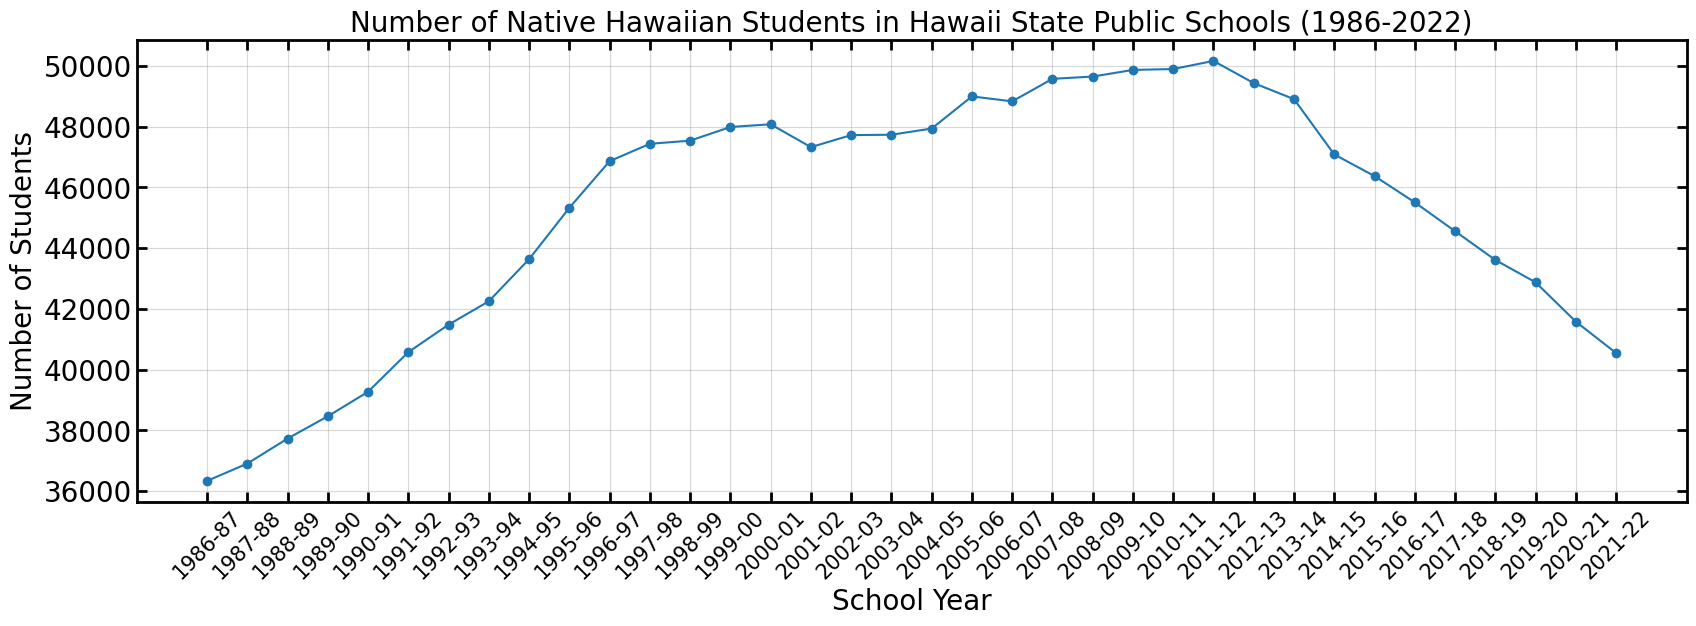

In [69]:
plt.figure(figsize=(20,6))

plt.plot(publicHS["School_Year"], publicHS["Native_Hawaiian"], marker='o', label="Native Hawaiian Students")

plt.title('Number of Native Hawaiian Students in Hawaii State Public Schools (1986-2022)', fontsize=20)
plt.xlabel('School Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, fontsize=15)

plt.grid(True, alpha=0.5)
plt.show()

Let's compare the overall shape of the graph to all students.

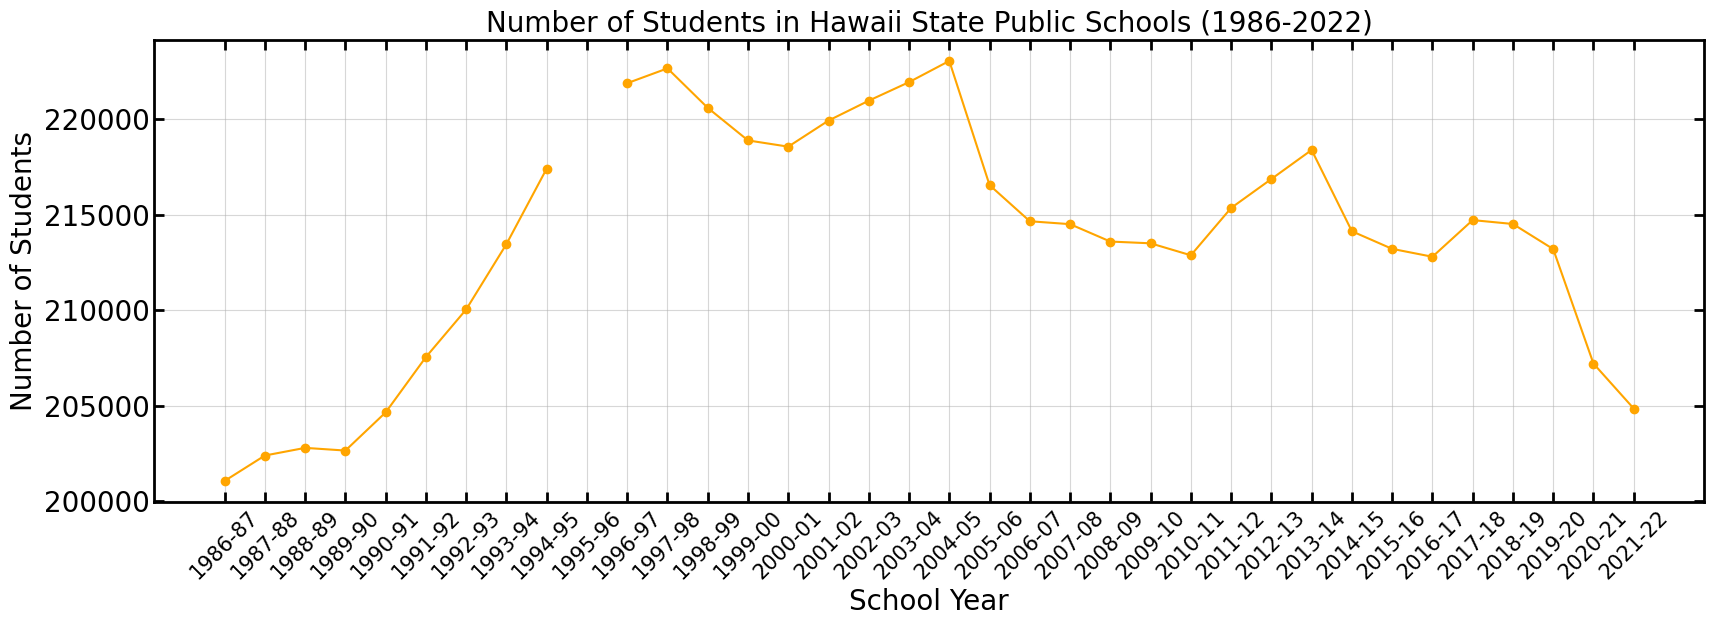

In [72]:
plt.figure(figsize=(20,6))

plt.plot(publicHS["School_Year"], publicHS["All_Students"], marker='o', color='orange')

plt.title('Number of Students in Hawaii State Public Schools (1986-2022)', fontsize=20)
plt.xlabel('School Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, fontsize=15)

plt.grid(True, alpha=0.5)
plt.show()

We see two, very distinct shapes when comparing the Number of Native Hawaiian students versues number of all students enrolled in Hawaii State Public Schools. There is a linear increase of Native Hawaiian student enrollment up until 1996, where it begins increase at a decreased rate than before which then levels out till 2011 where it reaches a maximum. Then we have a sharp decline of enrollment up until 2021-2022 school year, where we match enrollment numbers of 1991-1992. Meanwhile, the overall student enrollment throughout the state has a almost stock-market-like rise and fall throughout the years, but we do see the same decrease as we go into the modern era of 2021-2022. It appears that enrollement overall is decreasing, for both all students in Hawaii and Native Hawaiian students in the public school system. At the time the audit was done, they were actually in a "boom" of enrollment.

This lines up with Honolulu Civil Beat's recent article, stating that "Over the past 20 years, enrollment in Hawaiʻi public schools has dropped from nearly 176,000 to 152,000 students, a 13% decrease. The department predicts it will lose an additional 14,600 students by the end of the decade." [https://www.civilbeat.org/2025/03/hawai%CA%BBis-smallest-elementary-schools-could-face-closure/]

***

## How has the educational attainment for Native Hawaiians changed from 2010-2021? How does this compare to other ethnicities in Hawaiʻi?

Now, I'd like to look into the educational attainment for Native Hawaiians: less than a high school diploma, high school graduate, some level of college (associates degree), bachelor's degree, etc. But specifically, how these percentages have changed over time, and how they compare to the current ethnic majority in Hawaii which is individuals of Japanese descent. 

We'll need to load in a different sheet from our excel document, which is Table 6.72 for Native Hawaiian education attainment information, and Table 6.73 which contains other ethnicities education attainment information. I'll be loading in these tables and cleaning them separately as they require individual attention. 

In [73]:
attainmentNH = pd.read_excel(excel, sheet_name="Table 6.72")  

In [76]:
attainmentNH.head(8)

,Table 06.72 Native Hawaiian Educational Attainment: State of Hawaiÿi 2010-2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Educational Attainment,Native Hawaiian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,...,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN
3,NaN,2010,NaN,2011,NaN,2012,NaN,2013,NaN,2014,...,2017,NaN,2018,NaN,2019,NaN,2020 *,NaN,2021,NaN
4,NaN,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
5,Population 25 years and over,145815,"±6,568",158281,"±6,342",158361,"±6,390",160176,"±6,097",167660,...,171085,"±6,305",181966,"±6,199",163273,"±6,800",NaN,NaN,182554,"±8,713"
6,Less than high school diploma,0.088,±1.2,0.086,±1.1,0.102,±1.2,0.076,±1.0,0.075,...,0.072,±1.0,0.075,±1,0.062,±1.0,NaN,NaN,0.067,±1.0
7,High school graduate (includes equivalency),0.455,±2.6,0.439,±2.2,0.424,±1.9,0.427,±2.2,0.435,...,0.435,±2.0,0.401,±2,0.446,±2.6,NaN,NaN,0.419,±2.2


As we have seen from answering our first question, we have very messy data! Since viewing this data within excel gives us an excel sheet with a table within a table, we've reached a new level of complexity. In an attempt to clean this data, let's start with loading in this data without the header and dropping any competely empty rows. 

In [80]:
attainmentNH = pd.read_excel(excel, sheet_name="Table 6.72", header=None)

attainmentNH = attainmentNH.dropna(how='all')

attainmentNH.head(8)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Table 06.72 Native Hawaiian Educational Attai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Educational Attainment,Native Hawaiian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,...,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN,State of Hawaiÿi,NaN
4,NaN,2010,NaN,2011,NaN,2012,NaN,2013,NaN,2014,...,2017,NaN,2018,NaN,2019,NaN,2020 *,NaN,2021,NaN
5,NaN,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
6,Population 25 years and over,145815,"±6,568",158281,"±6,342",158361,"±6,390",160176,"±6,097",167660,...,171085,"±6,305",181966,"±6,199",163273,"±6,800",NaN,NaN,182554,"±8,713"
7,Less than high school diploma,0.088,±1.2,0.086,±1.1,0.102,±1.2,0.076,±1.0,0.075,...,0.072,±1.0,0.075,±1,0.062,±1.0,NaN,NaN,0.067,±1.0
8,High school graduate (includes equivalency),0.455,±2.6,0.439,±2.2,0.424,±1.9,0.427,±2.2,0.435,...,0.435,±2.0,0.401,±2,0.446,±2.6,NaN,NaN,0.419,±2.2


Great, our data is visually much clearer. Our next steps (which are guided that we can easily view the original excel file), is we want to select row 3, and forward fill it which will return a series/dataframe, or None, in this case it should be filling our "header" with years. Then, we want to extract the actual years using .iloc since it alternates between NaN and the year and turn it into a numpy array. We also add another variable since our Estimate and Margin of Error oscillate.

In [113]:
columns_row = attainmentNH.iloc[3].ffill() 
years = attainmentNH.iloc[3].ffill().values[1:]
types = attainmentNH.iloc[4].values[1:]

print(years)
print(types)

[2010 2010 2011 2011 2012 2012 2013 2013 2014 2014 2015 2015 2016 2016
 2017 2017 2018 2018 2019 2019 '2020 *' '2020 *' 2021 2021]
['Estimate' 'Margin of Error' 'Estimate' 'Margin of Error' 'Estimate'
 'Margin of Error' 'Estimate' 'Margin of Error' 'Estimate'
 'Margin of Error' 'Estimate' 'Margin of Error' 'Estimate'
 'Margin of Error' 'Estimate' 'Margin of Error' 'Estimate'
 'Margin of Error' 'Estimate' 'Margin of Error' 'Estimate'
 'Margin of Error' 'Estimate' 'Margin of Error']


Now, we want to extract the data we want which starts from row 5, storing this data in a variable called "attain_data". We make a copy so we don't overwrite our original data frame in case we need to use it down the line. So now we've isolated our table body from the extra headers and footnotes present in the excel file. We assign column names where our first column is called "Metric" which stores the level of educational attainment, then we oscillator between the estimate, and the margin of error, where I used Chat GPT to help me assign that estimate and margin of error are oscillating and figuring out how to combine this into the combined columns. The .strip function removing leading and trailing characters from a string. We can check this by printing the columns.

In [116]:
combined_cols = ["Metric"] + [f"{str(y).strip()}_{str(t).strip()}" for y, t in zip(years, types)]

attain_data = attainmentNH.iloc[5:].copy()  
attain_data.columns = combined_cols

print(attain_data.columns)

Index(['Metric', '2010_Estimate', '2010_Margin of Error', '2011_Estimate',
       '2011_Margin of Error', '2012_Estimate', '2012_Margin of Error',
       '2013_Estimate', '2013_Margin of Error', '2014_Estimate',
       '2014_Margin of Error', '2015_Estimate', '2015_Margin of Error',
       '2016_Estimate', '2016_Margin of Error', '2017_Estimate',
       '2017_Margin of Error', '2018_Estimate', '2018_Margin of Error',
       '2019_Estimate', '2019_Margin of Error', '2020 *_Estimate',
       '2020 *_Margin of Error', '2021_Estimate', '2021_Margin of Error'],
      dtype='object')


Again referencing the fact that we can view the excel file, we want to drop the footnote, along with any other information that occurs outside of our data frame. This includes information on COVID, Source, NaN, Notes, etc. These will be in the form of strings, so we dictate that as well with a boolean mask.

In [117]:
attain_data = attain_data[~attain_data["Metric"].astype(str).str.contains("Margin|Source|COVID|Note|nan", case=False)]

Let's take a look at what we have!

In [121]:
attain_data.shape

(38, 25)

Great! But we have way too many rows, so what's happening? Well, this is a result of having multiple tables within a single excel sheet. After a certain row, we get to Educational Attainment information based on the United States for Native Hawaiians. I don't want that information (you're free to check it out for yourself using this code), so let's try and limit our focus. We care about only five metrics: Less than high school diploma, High school graduate (includes equivalency), Some college or associate's degree, Bachelor's degree, and Graduate or professional degree. Let's make a list with these metrics, let's drop any duplicates, make two data frames one to hold our estimates and one for our margin of errors.

In [154]:
focus_metrics = ["Less than high school diploma", "High school graduate (includes equivalency)", "Some college or associate's degree",  "Bachelor's degree", "Graduate or professional degree"]

filtered_attainment = attain_data[attain_data["Metric"].isin(focus_metrics)].drop_duplicates(subset="Metric")

estimate_cols = [col for col in attain_data.columns if "Estimate" in col]
moe_cols = [col for col in attain_data.columns if "Margin" in col or "±" in col]

print(filtered_attainment.shape)

print(estimate_cols)

(5, 25)
['2010_Estimate', '2011_Estimate', '2012_Estimate', '2013_Estimate', '2014_Estimate', '2015_Estimate', '2016_Estimate', '2017_Estimate', '2018_Estimate', '2019_Estimate', '2020 *_Estimate', '2021_Estimate']


We're nearly there. We want to reshape our data frame so we can plot by time (year), which is why we extracted the columns from earlier! We need to transpose our data, then use the columns we created in the prior chunk of code.

In [182]:
estimates = filtered_attainment[["Metric"] + estimate_cols].set_index("Metric").T
moes = filtered_attainment[["Metric"] + moe_cols].set_index("Metric").T

We need to strip the $\pm$ from the margin of errors. We can do this using .replace, giving it [^\d.]+ which asks python to get rid of anything that is non-numeric, and non-dot characters. Then our .apply function converts our strings into floats such that we can plot things for later! We check if we did our job correctly using .head().

In [192]:
moes_cleaned = moes.replace(r"[^\d.]+", "", regex=True).apply(pd.to_numeric, errors="coerce")

In [193]:
moes_cleaned.head(5)

Metric,Less than high school diploma,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree,Graduate or professional degree
2010_Margin of Error,1.2,2.6,2.0,1.2,0.8
2011_Margin of Error,1.1,2.2,2.2,1.3,0.7
2012_Margin of Error,1.2,1.9,2.0,1.2,0.8
2013_Margin of Error,1.0,2.2,2.2,1.2,0.8
2014_Margin of Error,0.9,1.8,1.7,1.2,0.7


Almost (almost) there. We have three more steps before we can plot anything. We need to grab the indexs, extracting the year, and use .squeeze() which converts a one-column dataframe into a single pandas series, then turns those years into a string. This is such that we can plot by time! I had to ask my friend Uli on how to do this.

In [185]:
estimates.index = estimates.index.str.extract(r"(\d{4})").squeeze().astype(int)
moes_cleaned.index = moes.index.str.extract(r"(\d{4})").squeeze().astype(int)

estimates.index.name = "Year"
moes_cleaned.index.name = "Year"

Then, we ensure all of our data inside our data frame is numeric. We define errors='coerce' which means anything that doesn't work gets turned into a NaN value.

In [194]:
estimates = estimates.apply(pd.to_numeric, errors='coerce')
moes_cleaned = moes_cleaned.apply(pd.to_numeric, errors='coerce')

estimates.head(2)

Metric,Less than high school diploma,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree,Graduate or professional degree
Year,,,,,
2010,0.088,0.455,0.314,0.101,0.042
2011,0.086,0.439,0.324,0.099,0.052


In [195]:
moes_cleaned.head(2)

Metric,Less than high school diploma,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree,Graduate or professional degree
2010_Margin of Error,1.2,2.6,2.0,1.2,0.8
2011_Margin of Error,1.1,2.2,2.2,1.3,0.7


Finally, we can plot. I'll be using a loop here since we have a lot of information to parse through. We're plotting by the index (which we defined earlier), then we multiply estimates[metric] by 100 since we have decimal values, not percentages, then we define our yerr to be our margin of errors from our moes_cleaned data frame. 

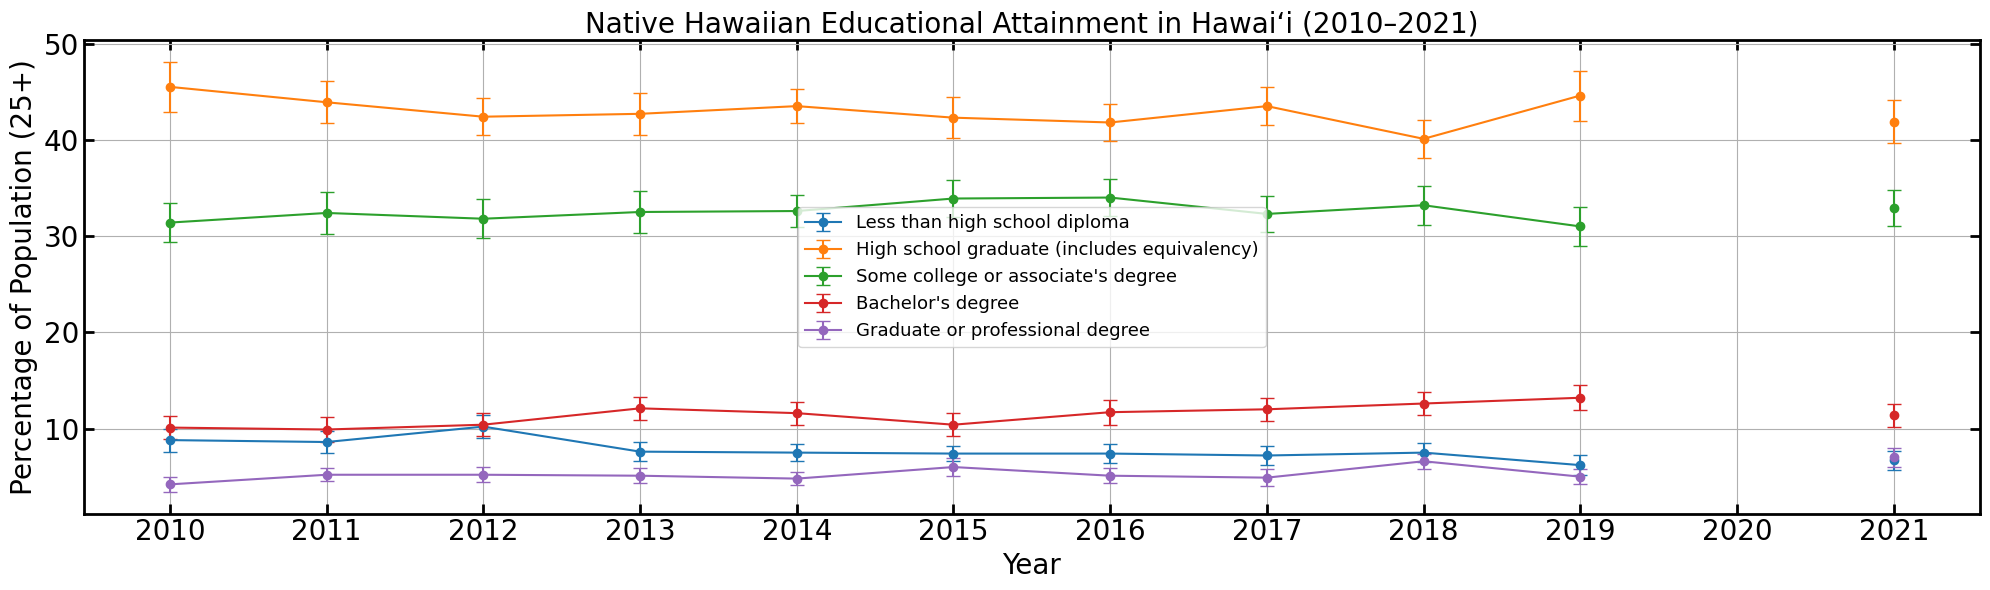

In [200]:
plt.figure(figsize=(20, 6))
for metric in estimates.columns:
    plt.errorbar(estimates.index, estimates[metric] * 100, yerr=moes_cleaned[metric], fmt='-o', label=metric, capsize=5)

plt.title("Native Hawaiian Educational Attainment in Hawaiʻi (2010–2021)", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Percentage of Population (25+)")

plt.legend(fontsize=13)
plt.grid(True)
plt.xticks(estimates.index)

plt.tight_layout()
plt.show()

We now have a visualization of Native Hawaiian Educational Attainment in Hawaii, from 2010 to 2021, with 2020 not having data collected (presumably due to the COVID-19 pandemic causing data collection issues.) This is for the Native Hawaiian population above the age of 25+, with no difference between gender for this plot. We see that a little less than half of Native Hawaiians have a High school diploma or equivalent, and that has stayed relatively stable over the years. I'm glad to see that on average, less than 10% of Native Hawaiians have less than a high school diploma, but that number is still too high (we will compare to those of Japanese descent soon.) The number of Bachelor's degree awarded has increased over time, but dropped after the peak of the COVID-19 pandemic. And we can see that Native Hawaiians recieving a Graduate or professional degree is still well below what appears to be 5%, and doesn't have a strong increase over time.  

Let's now compare these statistics to individuals in Hawaii of Japanese descent. We'll need to load in Table 6.73 which holds other ethnicity data, and this data is for 2021 only. I follow most of the same cleanup, but there are some nuances.

In [203]:
attainmentALL = pd.read_excel(excel, sheet_name="Table 6.73", header=None)

In [204]:
attainmentALL.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Table 06.73 Educational Attainment by Race-Et...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Educational Attainment,State of Hawaiÿi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Native Hawaiian,NaN,White,NaN,Chinese,NaN,Filipino,NaN,Japanese,NaN,Total Population,NaN
4,NaN,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
5,Population 25 years and over,182554,"±8,713",408524,"±7,965",137294,"±7,270",228776,"±8,416",226435,"±7,493",1021687,"±1,837"
6,Less than high school diploma,0.067,±1.0,0.041,±0.6,0.085,±1.3,0.106,±1.2,0.036,±0.7,0.071,±0.5
7,High school graduate (includes equivalency),0.419,±2.2,0.217,±1.3,0.246,±2.2,0.308,±1.7,0.218,±1.6,0.263,±0.8
8,Some college or associate's degree,0.329,±1.9,0.324,±1.2,0.285,±2.0,0.353,±1.6,0.317,±1.6,0.313,±0.7
9,Bachelor's degree,0.114,±1.2,0.243,±1.1,0.228,±1.8,0.179,±1.5,0.292,±1.3,0.222,±0.7


In a slightly different way, since I only want to select certain columns (seven columns total, for a single year), this process is much faster. So I'll start by creating a list with the rows that I want to keep, which is from 6-10 that has the population 25 years and over with education attainments. Then, I can make an empty list that I can fill by using a for loop to go through each of my selected rows, appending each data to create a clean data frame, and taking care of any errors by filling them in with NaN values. We use .iloc to select by index since we're looping through the rows. 

In [207]:
selected_rows = [6, 7, 8, 9, 10]

In [208]:
attainment_data = []
for row in selected_rows:
    label = attainmentALL.iloc[row, 0]
    nh_val, nh_moe = attainmentALL.iloc[row, 1], attainmentALL.iloc[row, 2]
    jp_val, jp_moe = attainmentALL.iloc[row, 9], attainmentALL.iloc[row, 10]
    tp_val, tp_moe = attainmentALL.iloc[row, 11], attainmentALL.iloc[row, 12]
    
    attainment_data.append({"Educational Attainment": label, "Native Hawaiian (%)": pd.to_numeric(nh_val, errors='coerce') * 100, "NH MoE": nh_moe, "Japanese (%)": pd.to_numeric(jp_val, errors='coerce') * 100, "JP MoE": jp_moe, "Total Pop (%)": pd.to_numeric(tp_val, errors='coerce') * 100, "TP MoE": tp_moe})

attainment_dataALL = pd.DataFrame(attainment_data)

In [210]:
attainment_dataALL

,Educational Attainment,Native Hawaiian (%),NH MoE,Japanese (%),JP MoE,Total Pop (%),TP MoE
0,Less than high school diploma,6.7,±1.0,3.6,±0.7,7.1,±0.5
1,High school graduate (includes equivalency),41.9,±2.2,21.8,±1.6,26.3,±0.8
2,Some college or associate's degree,32.9,±1.9,31.7,±1.6,31.3,±0.7
3,Bachelor's degree,11.4,±1.2,29.2,±1.3,22.2,±0.7
4,Graduate or professional degree,7.0,±1.0,13.8,±1.3,13.1,±0.5


Great! Let's compare now. We see that out of the total population of Hawaii that is over the age of 25, 7.1% have less than a high school diploma. We see that Japanese individuals have a much lower rate, of only 3.6%, compared to Native Hawaiians which is nearly double, 6.7%. We can notice a stark contrast between Native Hawaiians over the age of 25 education attainment's with Japanese individuals, as only 11.4% of Native Hawaiians having Bachelor's degrees, compared to the 29.2% of Japanese individuals. We continue to see nearly a two-fold difference when looking at graduate and professional degrees, with 7.0% for Native Hawaiians and 13.8% for Japanese individuals. This reality is echoed as the first Native Hawaiian to earn a Ph.D. in applied mathematics was just awarded in 2020 [https://www.hawaii.edu/news/2020/08/11/yong-multiplies-math-successes/]. 

***

## How is Native Hawaiian enrollment in public high school currently distributed geographically across islands? Which district has the highest proportion of Native Hawaiian students in public high schools?

Now, for our final question, and what I predict to be the most difficult. I want to showcase how Native Hawaiian enrollment in public high schools are distributed geographically across islands. Table 6.06 within the excel sheet has data on Public School Native Hawaiian Enrollment by Island, School District, School Complex, Grade, and School in Hawaii. This has data from the 2015-16 to 2022-23 school year. I'll be focusing on the most recent school year, 2022-23. I'll start as I have before, loading in my data, then taking a look at the first couple of columns.

In [258]:
table606 = pd.read_excel(excel, sheet_name="Table 6.06")

In [259]:
table606.head(5)

,"Table 6.06 Public School Native Hawaiian Enrollment by Island, School District, School Complex, Grade, and School in Hawai‘i: SY 2015‑16 to SY 2022-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Island,School District,School Complex,Grade Level,School Name,Fall Enrollment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,SY2015-2016,NaN,NaN,SY 2016-2017,NaN,...,NaN,SY2020-2021,NaN,NaN,SY2021-2022,NaN,NaN,SY2022-2023,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Total Enrollment,Native Hawaiian Students,NaN,Total Enrollment,Native Hawaiian Students,...,NaN,Total Enrollment,Native Hawaiian Students,NaN,Total Enrollment,Native Hawaiian Students,NaN,Total Enrollment,Native Hawaiian Students,NaN
4,NaN,NaN,NaN,NaN,NaN,No.,No.,%,No.,No.,...,%,No.,No.,%,No.,No.,%,No.,No.,%


We can identify the following columns: island, school district, school complex, school name, grade level. I'll re-import my excel table, defining that I intend to use the 4th row as my header. 

In [260]:
table606 = pd.read_excel(excel, sheet_name="Table 6.06",header=4)

table606.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total Enrollment,Native Hawaiian Students,Unnamed: 7,Total Enrollment.1,Native Hawaiian Students.1,...,Unnamed: 19,Total Enrollment.5,Native Hawaiian Students.5,Unnamed: 22,Total Enrollment.6,Native Hawaiian Students.6,Unnamed: 25,Total Enrollment.7,Native Hawaiian Students.7,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,No.,No.,%,No.,No.,...,%,No.,No.,%,No.,No.,%,No.,No.,%
1,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,‘Aiea Elementary School,366,73,0.199454,370,76,...,0.19195,304,51,0.167763,313,46,0.146965,289,30,0.103806
2,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Äliamanu Elementary School,627,28,0.044657,641,23,...,0.035484,610,26,0.042623,634,34,0.053628,638,31,0.048589
3,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Alvan A. Scott Elementary School,497,86,0.173038,512,90,...,0.163561,448,80,0.178571,451,79,0.175166,412,62,0.150485
4,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Chester W. Nimitz Elementary School,682,3,0.004399,685,4,...,0.004418,523,4,0.007648,554,11,0.019856,533,10,0.018762


Great, we got rid of a bit of the mess, but we've kept the headers for the relevant columns that dictate the total enrollment at the school, then the total number of native hawaiian students enrolled. I'll have to manually rename the first five columns since we cut them off and we have Unnamed: 0 and so on. From there, I want to grab the last three columns of the spreadsheet which corresponds to the most recent data from the 2021-2022 school year for the total enrollment, Native Hawaiian student count, and then Native Hawaiian percentage. From there, I'll need to create a cleaner version of my original dataset (table606) with the columns that I care about: Island, District, School Name, Grade Level, Total Enrollment, Native Hawaiian count, Native Hawaiian percentage and drop all other columns that aren't needed. 

I had an error with my column re-naming, so I had to go looking for solutions, which I found on StackOverflow: [https://stackoverflow.com/questions/46221280/index-objects-in-pandas-why-pd-columns-returns-index-rather-than-list]

In [263]:
table606_columns = ["Island", "District", "Complex", "Grade Level", "School Name"]
enrollment_columns = table606.columns[-3:]

table606.columns = table606_columns + list(table606.columns[5:])
table606 = table606[table606_columns + list(enrollment_columns)]

table606.columns = table606_columns + ["Total Enrollment", "Native Hawaiian Count", "Native Hawaiian %"]

table606.head(5)

,Island,District,Complex,Grade Level,School Name,Total Enrollment,Native Hawaiian Count,Native Hawaiian %
0,NaN,NaN,NaN,NaN,NaN,No.,No.,%
1,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,‘Aiea Elementary School,289,30,0.103806
2,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Äliamanu Elementary School,638,31,0.048589
3,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Alvan A. Scott Elementary School,412,62,0.150485
4,O‘ahu,Central District,Aiea-Moanalua-Radford,Elementary School,Chester W. Nimitz Elementary School,533,10,0.018762


We have NaN values (from me not cutting off more header, but I wanted to keep the Native Hawaiian Students header as a point of reference. We have an issue with the last column being un-named, let's look back at that in a bit after we drop that row that has NaN values, along with any schools that are not labeled as High Schools.

In [264]:
high_schools = table606[table606["Grade Level"] == "High School"].copy()

high_schools.head(5)

,Island,District,Complex,Grade Level,School Name,Total Enrollment,Native Hawaiian Count,Native Hawaiian %
20,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Admiral Arthur W. Radford High School,1267,53,0.041831
21,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,‘Aiea High School,995,170,0.170854
22,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Moanalua High School,2064,193,0.093508
40,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Leilehua High School,1625,265,0.163077
41,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Mililani High School,2565,333,0.129825


In [276]:
high_schools.shape

(34, 8)

Let's handle that column name error along with cleaning the school names for standarization. We'll have to use our .strip() function again, which will remove any uppercase or excess white space.

In [272]:
high_schools["School Name"] = high_schools["School Name"].str.strip()

In [274]:
high_schools.head(5)

,Island,District,Complex,Grade Level,School Name,Total Enrollment,Native Hawaiian Count,Native Hawaiian %
20,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Admiral Arthur W. Radford High School,1267,53,0.041831
21,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,‘Aiea High School,995,170,0.170854
22,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Moanalua High School,2064,193,0.093508
40,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Leilehua High School,1625,265,0.163077
41,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Mililani High School,2565,333,0.129825


In [275]:
high_schools.shape

(34, 8)

Great! That's our data cleaned, and we have a total of 34 public state Hawaii high schools that we were able to distinguish for this analysis. Now that we have the School Names, we'll want to work on the visualization, where I'll be using geopy.gecoders' Nominatim and geopy.extra.rate_limiter's Rate Limiter to get the latitude and longitude of each of these schools using their names. Here is the offical link to geopy [https://geopy.readthedocs.io/en/stable/], which showcases most of the code I referenced to query latitude and longitude coordinates. Geopy uses google maps, so if the names match what's on google maps, we should get coordinates. Here is the usage with Pandas specific documentation [https://geopy.readthedocs.io/en/stable/#usage-with-pandas].

In [278]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [280]:
geolocator = Nominatim(user_agent="hawaii_school_mapper")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

high_schools["full_query"] = high_schools["School Name"] + ", Hawaii"

high_schools["location"] = high_schools["full_query"].apply(geocode)
high_schools["latitude"] = high_schools["location"].apply(lambda loc: loc.latitude if loc else None)
high_schools["longitude"] = high_schools["location"].apply(lambda loc: loc.longitude if loc else None)


print(high_schools[["School Name", "latitude", "longitude"]])

                                         School Name   latitude   longitude
20             Admiral Arthur W. Radford High School  21.359671 -157.928316
21                                 ‘Aiea High School  21.384417 -157.929814
22                              Moanalua High School  21.346929 -157.899964
40                              Leilehua High School  21.500468 -158.012041
41                              Mililani High School  21.453325 -158.011508
73                       Henry J. Kaiser High School  21.285106 -157.696138
74                                Kalani High School  21.279223 -157.773822
75              Wallace Rider Farrington High School        NaN         NaN
102                              Kaimukï High School  21.285788 -157.817579
103                   Theodore Roosevelt High School        NaN         NaN
104                     William McKinley High School        NaN         NaN
132                       James Campbell High School  21.315814 -158.008428
133  The Kap

Great! But as we can see, geopy wasn't perfect, thus we are missing some values. This is because of the use of the okina (ʻ) symbol which is a Hawaiian diacritical mark that represents a glottal stop (pause in speech) that in my experience causes frequent errors when machines try to read. This is what has most likely happened to some of our schools such as Kapaʻa High School. We also have some other errors such as with Wallace Rider Farrington High School, as while this is the official name, it's more commonly referred to as Farrington High School. For our missing values, I'll manually go into Google Maps and find the latitude and longtitude.

In [282]:
manual_coords = {
    "Wallace Rider Farrington High School": (21.3297, -157.8677),
    "Theodore Roosevelt High School": (21.3089, -157.8341),
    "William McKinley High School": (21.2975, -157.8511),
    "The Kapolei Charter School By Goodwill Hawaiʻi1": (21.3346, -158.0554),
    "Wai‘anae High School": (21.4421, -158.1832),
    "Keaÿau High School": (19.6214, -155.0306),
    "Kapaÿa High School": (22.0882, -159.3377),
    "Kaua‘i High School": (21.9649, -159.3703),
    "Henry Perrine Baldwin High School": (20.8859, -156.4659),
    "King Kekaulike High School": (20.8469, -156.3301),
}

for school, (lat, lon) in manual_coords.items():
    mask = high_schools["School Name"] == school
    high_schools.loc[mask, "latitude"] = lat
    high_schools.loc[mask, "longitude"] = lon

Let's do a final check to ensure we have latitude and longitude coordinates for all of our public high schools. I'll check the dataframe for any NaN values. Since this is a short dataframe, I'll print it out.

In [285]:
high_schools

,Island,District,Complex,Grade Level,School Name,Total Enrollment,Native Hawaiian Count,Native Hawaiian %,full_query,location,latitude,longitude
20,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Admiral Arthur W. Radford High School,1267,53,0.041831,"Admiral Arthur W. Radford High School, Hawaii","(Admiral Arthur W. Radford High School, 4361, ...",21.359671,-157.928316
21,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,‘Aiea High School,995,170,0.170854,"‘Aiea High School, Hawaii","(Aiea High School, 98-1276, Ulune Street, ʻAie...",21.384417,-157.929814
22,O‘ahu,Central District,Aiea-Moanalua-Radford,High School,Moanalua High School,2064,193,0.093508,"Moanalua High School, Hawaii","(Moanalua High School, 2825, Ala ʻIlima Street...",21.346929,-157.899964
40,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Leilehua High School,1625,265,0.163077,"Leilehua High School, Hawaii","(Leilehua High School, California Avenue, Wahi...",21.500468,-158.012041
41,O‘ahu,Central District,Leilehua-Mililani-Waialua,High School,Mililani High School,2565,333,0.129825,"Mililani High School, Hawaii","(Mililani High School, Kipapa Drive, Mililani ...",21.453325,-158.011508
73,O‘ahu,Honolulu District,Farrington-Kaiser-Kalani,High School,Henry J. Kaiser High School,1160,154,0.132759,"Henry J. Kaiser High School, Hawaii","(Henry J. Kaiser High School, 511, Lunalilo Ho...",21.285106,-157.696138
74,O‘ahu,Honolulu District,Farrington-Kaiser-Kalani,High School,Kalani High School,1414,98,0.069307,"Kalani High School, Hawaii","(Kalani High School, 4680, Kalaniana’ole Highw...",21.279223,-157.773822
75,O‘ahu,Honolulu District,Farrington-Kaiser-Kalani,High School,Wallace Rider Farrington High School,2238,199,0.088919,"Wallace Rider Farrington High School, Hawaii",None,21.329700,-157.867700
102,O‘ahu,Honolulu District,Kaimuki-McKinley-Roosevelt,High School,Kaimukï High School,620,92,0.148387,"Kaimukï High School, Hawaii","(Kaimuki High School, Date Street, Kapahulu, E...",21.285788,-157.817579
103,O‘ahu,Honolulu District,Kaimuki-McKinley-Roosevelt,High School,Theodore Roosevelt High School,1433,228,0.159107,"Theodore Roosevelt High School, Hawaii",None,21.308900,-157.834100


Now for what we've been waiting for, the visualization! Since we have so many schools, I decided to make this an interactive geographic visualization, where I'll be using the package folium. We grazed on using folium when we were looking at Professor Wirfs-Brock's location data, but we haven't had the chance to code it ourselves. So this is my attempt to visualize the distribution of Native Hawaiian enrollment in public schools across the State of Hawaii. I'd like to also scale my circles based on how many students are enrolled at the school. If you click on the dot, it'll give you some information on the School's Name, the total enrollment of students, the total number of Native Hawaiian students, then the percentage of students enrolled that are Native Hawaiian. For the colors, I'll try to make a color map based on the proportion of Native Hawaiian students, with red being near 0, and green being 1 indicating almost all students enrolled are Native Hawaiian. 

To use folium, I used the following resources: https://python-visualization.github.io/folium/latest/getting_started.html , https://python-visualization.github.io/folium/latest/advanced_guide/colormaps.html , https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython , https://python-graph-gallery.com/312-add-markers-on-folium-map/ , https://github.com/python-visualization/folium/issues/1374 .

In [290]:
import folium
import branca.colormap as cm

To summarize what we want to do with folium, we want to set the map up to be centered around Hawaii (the latitude and longitude of approximately what we consider the center of Hawaii to be), which we use to create a folium map. CartoDB positron is defining the type of background map we want to use. Then, we need to create a color map/color scale along with a caption, then adding it to our folium map by using .add_to to our folium.map object. From there, we loop through our dataframe of latitude, longitude, along with the school name and percent of the student enrollment that is Native Hawaiian. From there, it goes to defining the radius of our circles based on enrollment numbers, then assigning a color, then logistics with defining the popup information. After that, we save our map and showcase it!

In [300]:
hawaii_center = [20.7967, -156.3319]
map_hi = folium.Map(location=hawaii_center, zoom_start=7, tiles="CartoDB positron")

colormap = cm.linear.RdYlGn_07.scale(0, 1).to_step(7)
colormap.caption = "Proportion of Native Hawaiian Students"

colormap.add_to(map_hi)

for _, row in high_schools.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    name = row["School Name"]
    nh_pct = row["Native Hawaiian %"]
    enrollment = row["Total Enrollment"]

    color = colormap(nh_pct)
    radius = (enrollment ** 0.5) / 2 

    folium.CircleMarker(location=[lat, lon], radius=radius, color=color, fill=True, fill_color=color, fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>{name}</b><br>"
            f"Total Enrollment: {int(enrollment)}<br>"
            f"Native Hawaiian Students: {row['Native Hawaiian Count']}<br>"
            f"Percent Native Hawaiian: {nh_pct:.1%}",
            max_width=300
        )
    ).add_to(map_hi)

map_hi.save("HawaiiSchoolsEnrollmentProportion_Map.html")
map_hi

Now we have a visualization that we can play around with. We see that overall on Oʻahu, we mostly have a low proportion of Native Hawaiian students enrolled, with the highest proportion being on Molokaʻi, along with being the only public high school. Aligning with Oʻahu having the highest population out of all the islands, the circles match that proportion, while Hawaiʻi island has the smallest proportion.

To quickly address my final closing off question, "Which district has the highest proportion of Native Hawaiian students in public high schools?" We do this with a simple .groupby() and .agg() function, to group the districts, take the sum of the schools within that district, then normalize the data in the next line.

In [299]:
district_summary = high_schools.groupby("District").agg({"Native Hawaiian Count": "sum", "Total Enrollment": "sum"})

district_summary["Native Hawaiian %"] = (district_summary["Native Hawaiian Count"] / district_summary["Total Enrollment"])

print(district_summary)

                  Native Hawaiian Count Total Enrollment Native Hawaiian %
District                                                                  
Central District                   1014             8516           0.11907
Hawai‘i District                   2180             6326           0.34461
Honolulu District                   901             8367          0.107685
Kaua‘i District                     762             2880          0.264583
Leeward District                   2625            11233          0.233686
Maui District                      1560             5923           0.26338
Windward District                   911             2800          0.325357


We can see that Hawai‘i District on Hawai‘i Island has the highest proportion of Native Hawaiian students enrolled in public high school with a proportion of 0.34 (34%), and that Honolulu District on O‘ahu has the lowest proportion of 0.10 (10%). This lines up with statistics from the the Census from the State of Hawai‘i conducted back in 2010 [https://files.hawaii.gov/dbedt/census/Census_2010/SF1/HSDC2010-4_Native_Hawaiian.pdf] where Hawai‘i County accounts for 29.7% of Native Hawaiians in the state, with O‘ahu only accounting for 19.1%.  

Overall, this data analysis project has allowed me to confirm readings showcasing that Native Hawaiian student enrollment, while has been increasing over the years, is suffering from the overall decreased enrollment of students in Hawai‘i in public schools, along with viewing that there still is a lack of Native Hawaiians within higher education. Futher analysis that could be done from this study is looking at the Native Hawaiian education attainment outlook from both public and private schools, seeing if there could be a trend with future outlooks, along with the socioeconomic information that could affect enrollment numbers.